In [1]:
import numpy as np
import matplotlib.pyplot as plt
import params as my

In [2]:
def theta_dist(x):
    return 2 * np.pi * np.sin(x)**3
def phi_dist(x):
    return 1/(2*np.pi)

In [5]:
N = 260000
a = 0
b = np.pi
c = 2*np.pi

theta_rand = np.random.uniform(a, b, size = N)
y_rand = np.random.uniform(0, c, size=N)
theta_gen = [theta_rand[i] for i in range(N) if (y_rand[i] <= theta_dist(theta_rand[i]))]

length = 100000

theta = theta_gen[0:length]

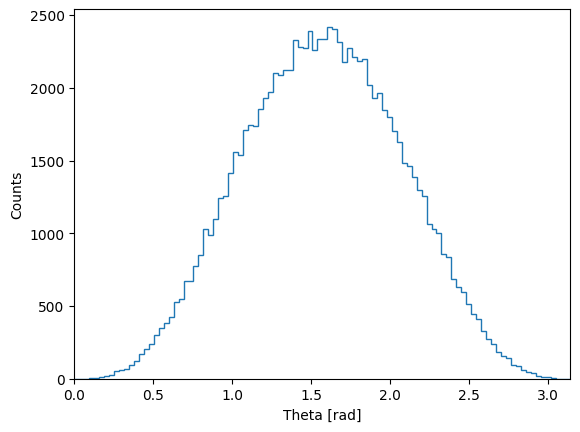

In [6]:
plt.hist(theta, bins = 100, range = (a,b), histtype = 'step')
plt.xlim(a,b)
plt.xlabel('Theta [rad]')
plt.ylabel('Counts')
plt.show()

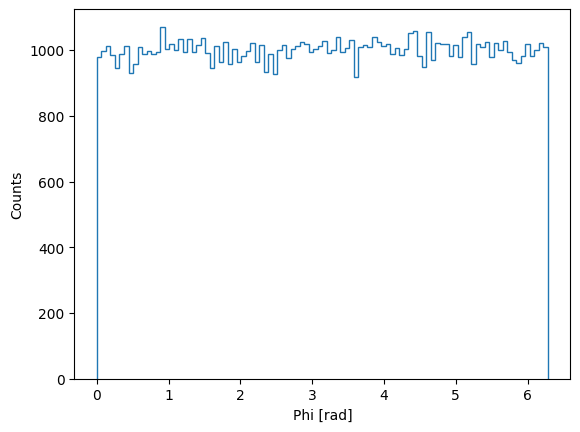

In [7]:
phi = np.random.uniform(0, 2*np.pi, size = length)
plt.hist(phi, histtype = 'step', bins = 100)
plt.xlabel('Phi [rad]')
plt.ylabel('Counts')
plt.show()

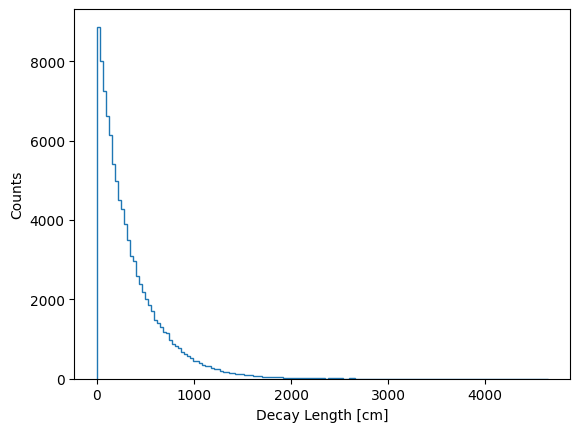

In [8]:
r = -my.l_L*np.log(1-np.random.uniform(0,1, size = length))
plt.hist(r, histtype = 'step', bins = 150)
plt.xlabel('Decay Length [cm]')
plt.ylabel('Counts')
plt.show()

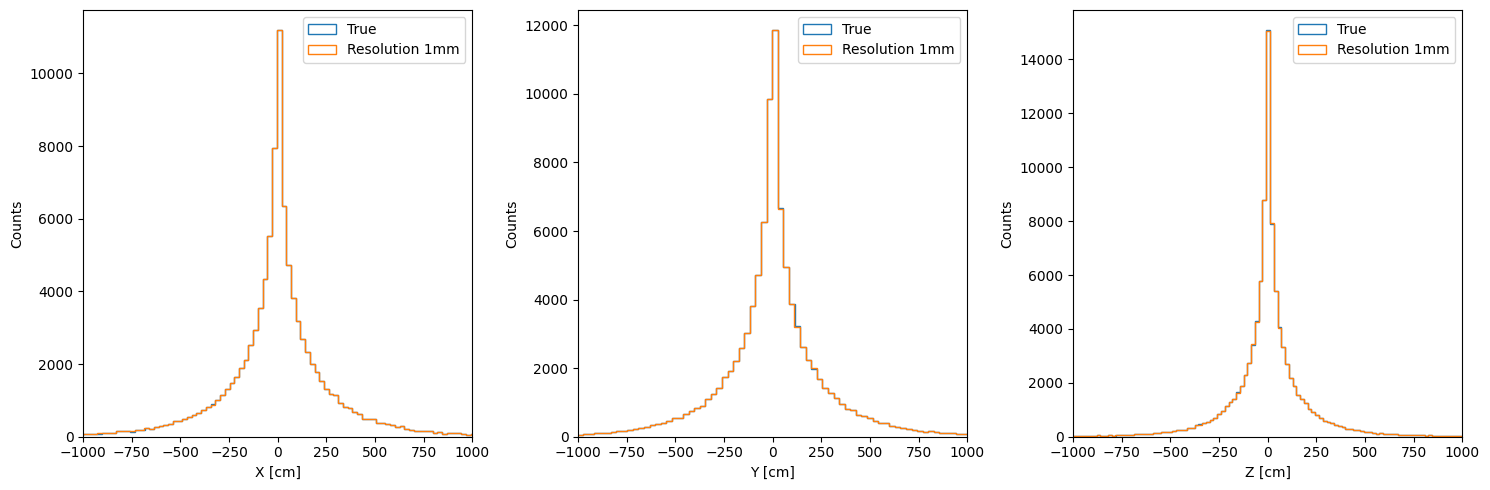

In [9]:
plt.figure(figsize = (15, 5))

plt.subplot(131)

x = r*np.sin(theta)*np.cos(phi)
smear_x = np.random.normal(loc = 0, scale = 0.1, size = length)
plt.hist(x, bins = 250, label = 'True', histtype = 'step')
plt.hist(x+smear_x, bins = 250, label = 'Resolution 1mm', histtype = 'step')
plt.xlim(-1000,1000)
plt.xlabel('X [cm]')
plt.ylabel('Counts')
plt.legend()

plt.subplot(132)
y = r*np.sin(theta)*np.sin(phi)
smear_y = np.random.normal(loc = 0, scale = 0.1, size = length)
plt.hist(y, bins = 250, label = 'True', histtype = 'step')
plt.hist(y+smear_y, bins = 250, label = 'Resolution 1mm', histtype = 'step')
plt.xlim(-1000,1000)
plt.xlabel('Y [cm]')
plt.ylabel('Counts')
plt.legend()

plt.subplot(133)
z = r*np.cos(theta)
smear_z = np.random.normal(loc = 0, scale = 0.1, size = length)
plt.hist(z, bins = 250, label = 'True', histtype = 'step')
plt.hist(z+smear_z, bins = 250, label = 'Resolution 1mm', histtype = 'step')
plt.xlim(-1000,1000)
plt.xlabel('Z [cm]')
plt.ylabel('Counts')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
cut_FV = (z<120) & (z>-120) & (np.sqrt(x**2+y**2) > 35) & (np.sqrt(x**2+y**2) < 150)
Acc = len(r[cut_FV])/len(x)
print(f'Acceptance (MC) = {Acc*100:.2f} %')

Acceptance (MC) = 26.36 %


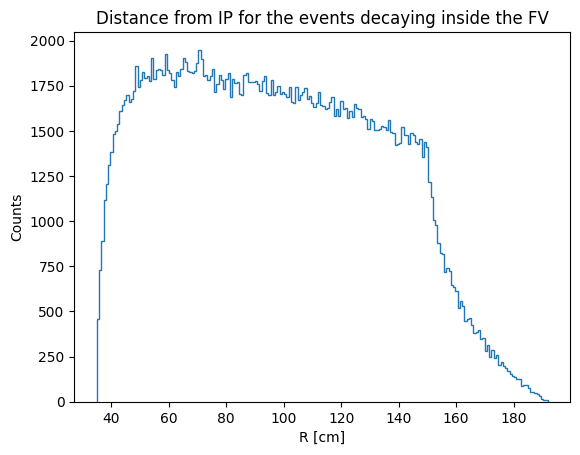

In [68]:
plt.title('Distance from IP for the events decaying inside the FV')
plt.hist(r[cut_FV], histtype = 'step', bins = 200)
plt.xlabel('R [cm]')
plt.ylabel('Counts')
plt.show()

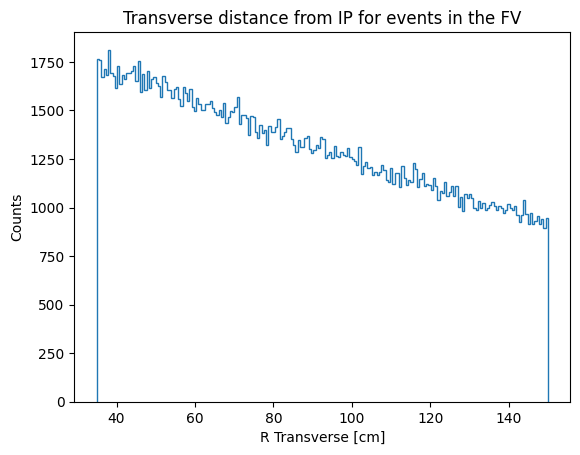

In [69]:
plt.title('Transverse distance from IP for events in the FV')
plt.hist(np.sqrt(x[cut_FV]**2 + y[cut_FV]**2), histtype = 'step', bins = 200)
plt.xlabel('R Transverse [cm]')
plt.ylabel('Counts')
plt.show()